# Machine learning project

> importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

> Load the californiya House Pricing dataset

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

> Check the description of the dataset

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [7]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


### Preparing the dataset

In [9]:
dataset = pd.DataFrame(housing.data,columns=housing.feature_names)

In [10]:
dataset["Price"] = housing.target

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [13]:
# summarizing the stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
# Check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [15]:
# Exploratory data analysis
## Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [16]:
import seaborn as sns
# sns.pairplot(dataset)

Text(0, 0.5, 'Price')

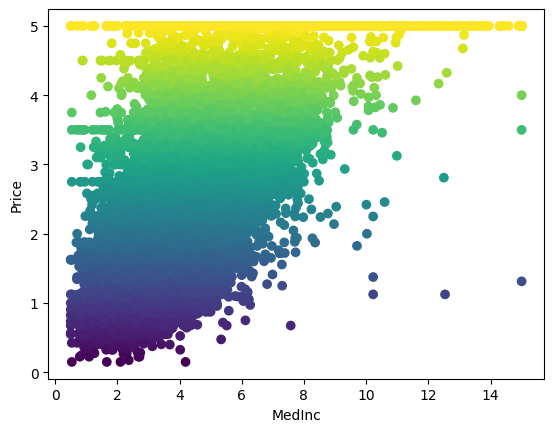

In [17]:
plt.scatter(dataset['MedInc'], dataset['Price'],c=dataset['Price'])
plt.xlabel('MedInc')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

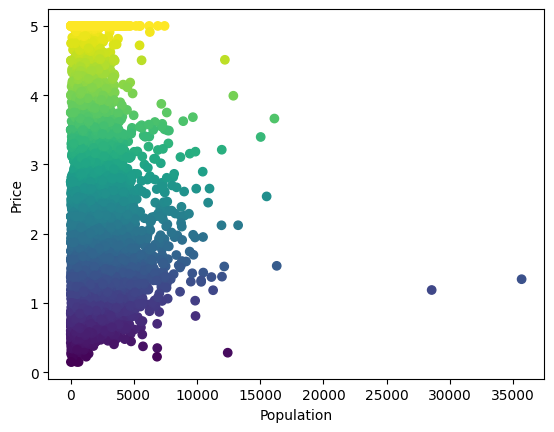

In [18]:
plt.scatter(dataset['Population'], dataset['Price'],c=dataset['Price'])
plt.xlabel('Population')
plt.ylabel('Price')

<Axes: xlabel='MedInc', ylabel='Price'>

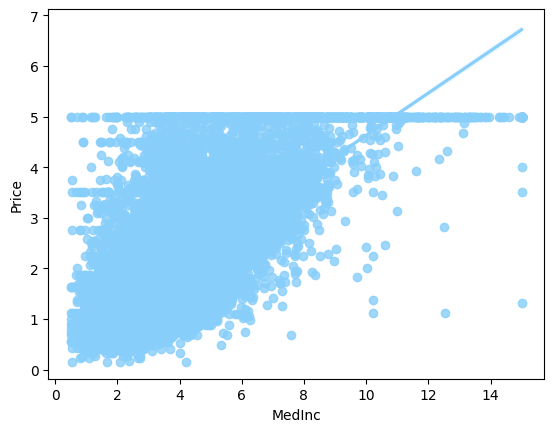

In [19]:
sns.regplot(x='MedInc',y='Price',data=dataset,color='#87CEFA')

## Independent and dependent features

In [20]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1:]

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [23]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [24]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17853,5.3994,23.0,5.019157,1.022989,910.0,3.486590,37.44,-121.88
15963,3.9567,52.0,5.173664,1.127863,1848.0,3.526718,37.71,-122.44
20106,3.0500,17.0,5.383764,1.095941,753.0,2.778598,37.94,-120.29
15525,2.2500,16.0,4.331113,1.109420,2737.0,2.604186,33.14,-117.05
5234,2.0187,39.0,4.876068,1.102564,1313.0,5.611111,33.94,-118.23
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5.109792,1.044510,648.0,1.922849,37.93,-122.53
7291,1.2059,18.0,2.537037,1.089744,1913.0,2.725071,33.98,-118.22
17728,5.5336,6.0,4.905336,0.965577,2160.0,3.717728,37.32,-121.79
7293,2.2059,35.0,2.748491,0.997988,2160.0,4.346076,33.98,-118.23


In [25]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20303,5.2783,12.0,4.466019,0.980583,405.0,3.932039,34.16,-119.18
16966,3.9722,27.0,4.619271,1.096357,1877.0,2.205640,37.55,-122.31
10623,4.5094,12.0,4.426380,1.092025,1913.0,1.956033,33.67,-117.77
6146,3.1034,29.0,4.597222,1.037037,2013.0,4.659722,34.11,-117.95
2208,4.6726,6.0,5.730303,1.033333,969.0,2.936364,36.81,-119.87
...,...,...,...,...,...,...,...,...
520,5.2128,52.0,5.862934,0.996139,1242.0,2.397683,37.76,-122.23
6833,3.1583,49.0,4.855586,1.019074,1010.0,2.752044,34.08,-118.12
9559,4.6667,10.0,6.314168,1.022587,1368.0,2.809035,37.37,-120.60
14878,4.6477,38.0,5.037288,0.911864,745.0,2.525424,32.64,-117.07


In [26]:
# Standerdize the dataset
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [27]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [28]:
import pickle
pickle.dump(scalar,open('scaling.pkl','wb'))

In [29]:
X_train

array([[ 0.81227025, -0.44350528, -0.16664269, ...,  0.06494541,
         0.83999711, -1.14723656],
       [ 0.04888899,  1.85414996, -0.1036322 , ...,  0.0707951 ,
         0.96603327, -1.42642929],
       [-0.43087659, -0.91888223, -0.0179501 , ..., -0.03826408,
         1.0733974 , -0.35452862],
       ...,
       [ 0.88328   , -1.79040663, -0.21306094, ...,  0.09864017,
         0.78398104, -1.1023663 ],
       [-0.87751839,  0.50724861, -1.09265745, ...,  0.19023936,
        -0.7751329 ,  0.6725018 ],
       [-0.62861387, -0.99811172, -0.60143478, ..., -0.08497825,
         0.77464503, -1.14723656]])

In [30]:
X_test

array([[ 0.74819216, -1.31502968, -0.39222127, ...,  0.12988191,
        -0.69110879,  0.19887127],
       [ 0.05709056, -0.12658732, -0.32972259, ..., -0.12178848,
         0.89134518, -1.36161669],
       [ 0.34134121, -1.31502968, -0.40838673, ..., -0.15817572,
        -0.91984108,  0.90183869],
       ...,
       [ 0.42457395, -1.47348867,  0.36148407, ..., -0.03382702,
         0.80732107, -0.50908174],
       [ 0.41452041,  0.74493708, -0.15924856, ..., -0.07517121,
        -1.40064567,  1.25082961],
       [-0.72190015, -0.83965274, -0.52666029, ...,  0.28998433,
         0.50390069, -0.54398083]])

## Model traning

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regression = LinearRegression()

In [33]:
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
# Print the coefficients
print(regression.coef_)

[[ 0.83329476  0.12211856 -0.28024737  0.33652609  0.00148665 -0.02868206
  -0.92659537 -0.89282551]]


In [35]:
#print the intercept
print(regression.intercept_)

[2.06661314]


In [36]:
# on  which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [37]:
# prediction with test data
reg_pred = regression.predict(X_test)

In [38]:
reg_pred

array([[3.00818422],
       [2.58387257],
       [2.35282009],
       ...,
       [1.78941655],
       [2.58881603],
       [1.44575813]])

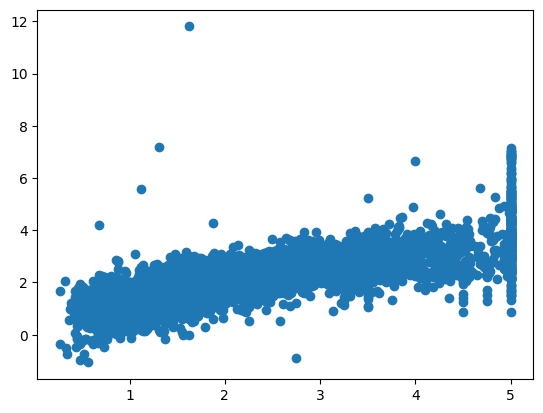

In [39]:
# plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [40]:
# Residuals
residuals = y_test - reg_pred

In [41]:
residuals

,Price
20303,-1.334184
16966,0.957127
10623,-0.750820
6146,-0.306735
2208,-0.666426
...,...
520,-0.127491
6833,0.697401
9559,-0.488417
14878,-1.084816


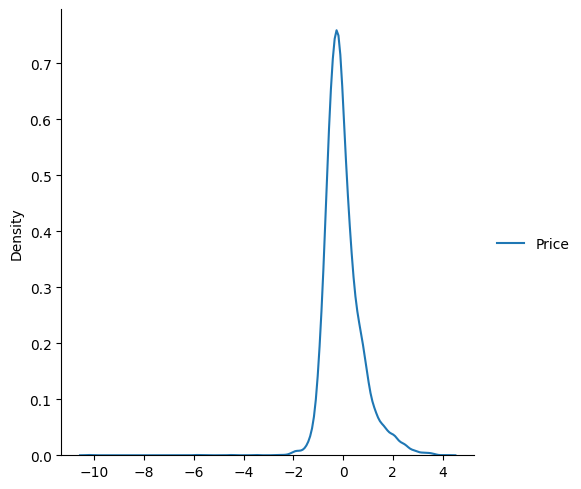

In [42]:
sns.displot(residuals,kind='kde')

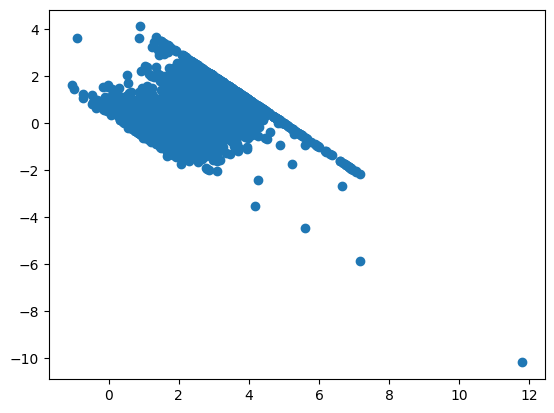

In [43]:
 # scatter plot with respect to predictions and residuals

plt.scatter(reg_pred,residuals)

- we get uniform distribution

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("mean_absolute_error: ",mean_absolute_error(y_test,reg_pred))
print("mean_squared_error: ",mean_squared_error(y_test,reg_pred))
print("Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test,reg_pred)))

mean_absolute_error:  0.5370779294017782
mean_squared_error:  0.5540440300082567
Root_mean_squared_error:  0.7443413397146881


In [45]:
# R square 
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.5913048824900672


In [46]:
# Adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)    

0.590776084020056

## New data prediction

In [48]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [49]:
# Transformation of new data
scalar.transform(housing.data[0].reshape(1,-1))

e:\Machine Learning\BostonHousePricing\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.36040979,  0.98262556,  0.63470414, -0.16692675, -0.97087337,
        -0.07077866,  1.04538937, -1.32173202]])

In [50]:
regression.predict(scalar.transform(housing.data[0].reshape(1,-1)))

e:\Machine Learning\BostonHousePricing\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[4.13148754]])

## Pickling the model file for deployment

In [51]:
import pickle

In [52]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [53]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [54]:
#prediction
pickled_model.predict(scalar.transform(housing.data[0].reshape(1,-1)))

e:\Machine Learning\BostonHousePricing\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[4.13148754]])